In [14]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv('/vgsales.csv')

# Show the first 5 rows
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [15]:
# Drop rows with missing values in 'Name' or 'Year'
df = df.dropna(subset=['Name', 'Year']).copy()  # <-- .copy() is the fix

# Now safely convert 'Year' to int
df['Year'] = df['Year'].astype(int)

# Remove duplicates by name
df = df.drop_duplicates(subset='Name')

# Show cleaned data
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


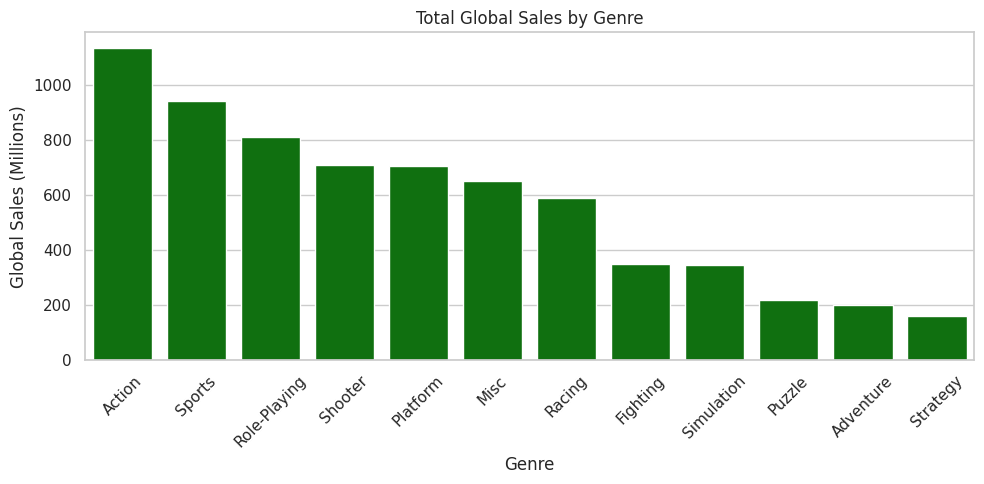

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: better chart style
sns.set(style="whitegrid")

# Genre sales (make sure you've run this line already)
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=genre_sales.index, y=genre_sales.values, color='green')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
top_10 = df.sort_values('Global_Sales', ascending=False).head(10)
top_10[['Name', 'Platform', 'Global_Sales']]

,Name,Platform,Global_Sales
0,Wii Sports,Wii,82.74
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.82
3,Wii Sports Resort,Wii,33.00
4,Pokemon Red/Pokemon Blue,GB,31.37
5,Tetris,GB,30.26
6,New Super Mario Bros.,DS,30.01
7,Wii Play,Wii,29.02
8,New Super Mario Bros. Wii,Wii,28.62
9,Duck Hunt,NES,28.31


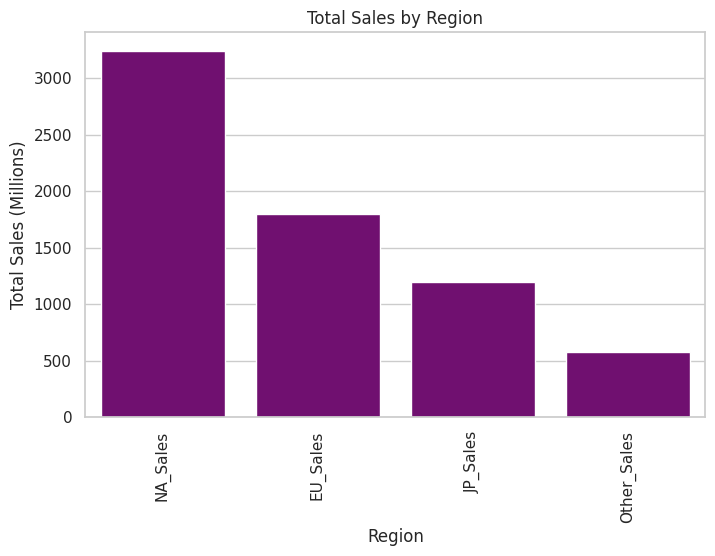

In [39]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales.plot(kind='bar', title='Total Sales by Region', figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, color='purple')
plt.xlabel('Region')
plt.ylabel('Total Sales (Millions)')
plt.show()

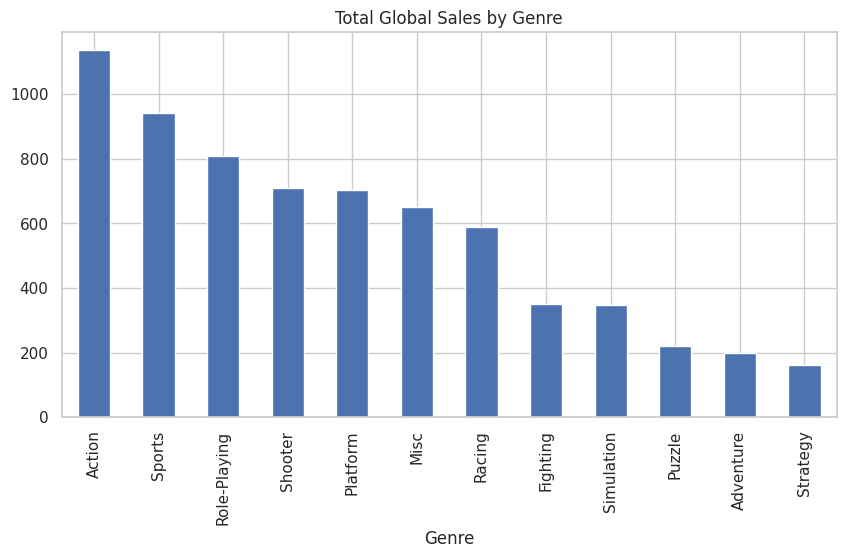

In [40]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Total Global Sales by Genre', figsize=(10,5))
plt.show()

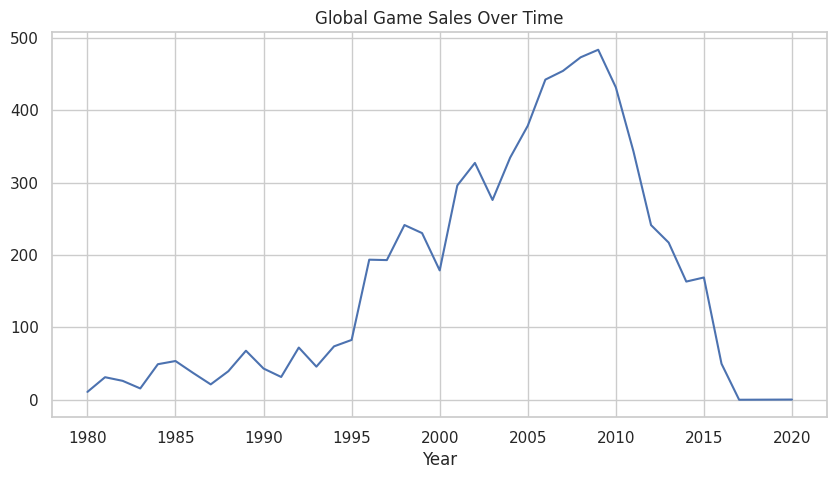

In [24]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
yearly_sales.plot(kind='line', title='Global Game Sales Over Time', figsize=(10,5))
plt.show()